# Gege Mayrendra

## Data Science Hck-04

# Working Area

## Problem Statement

`Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.`

### Import Libraries
`Importing data that we use during our project along with the library`

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import joblib
import json

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Loading

`we import our csv and inspect the characteristic from the dataset before we explore more`

`first of all, we need to reading our dataset and assigning into df variable, at this moment we also using function to separate the possibility missing value in dataset`

In [189]:
df = pd.read_csv('h8dsft_P1G4_Gege.csv',na_values=[' ', '-', '?' ,'n/a', 'na', '--'])

`using display max in order to keep all the columns shows`

In [190]:
pd.set_option('display.max_columns', None)

`calling the dataframe along with its head, tail and samples`

In [191]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [192]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [193]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [194]:
df.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,1674,0.000000,0.000000,136.80,0.00,136.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,127.996550,NaN,0.000000,12
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
4209,8474,4804.072481,1.000000,0.00,0.00,0.00,1116.128466,0.000000,0.000000,0.000000,0.583333,11,0,5000.0,1589.654582,1456.920041,0.000000,12
4455,4872,1338.934027,1.000000,0.00,0.00,0.00,1297.777178,0.000000,0.000000,0.000000,0.272727,7,0,4000.0,423.092478,634.989453,0.000000,11
2246,6690,483.261458,1.000000,3228.30,3228.30,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,34,600.0,3304.347175,476.295378,0.166667,12
1956,2678,3278.259894,1.000000,1581.43,1296.74,284.69,0.000000,0.583333,0.333333,0.500000,0.000000,0,41,8500.0,996.350965,1147.212494,0.000000,12
3355,4728,2479.815703,1.000000,5812.17,5142.57,669.60,638.563709,0.916667,0.750000,0.416667,0.083333,3,27,10500.0,4586.498256,680.372480,0.000000,12
80,5828,2332.392373,1.000000,306.36,0.00,306.36,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,7000.0,670.376849,627.343242,0.000000,12
1969,3632,7.950803,0.636364,92.20,0.00,92.20,0.000000,0.583333,0.000000,0.583333,0.000000,0,7,3000.0,152.592178,125.684033,0.166667,12
69,5002,23.111629,0.363636,237.66,0.00,237.66,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,3000.0,538.820587,131.332498,1.000000,12


`we need to know how many rows and columns in this dataset using .shape`

In [195]:
df.shape

(4475, 18)

`from .shape, now we know this dataset has 4475 rows and 18 columns`

`now check the dataframe just in case there are duplicated columns`

In [196]:
df[df.duplicated()].shape

(0, 18)

`after we check the duplicated data from our dataset using .duplicated, we believe that this dataset has not any duplicated columns`

`now we use df.info to know the dataset in general`

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

`from df.info we now know this dataset has 14 dtype float64, 4 dtype int64`

`before we move to the next processing steps, we have to make it sure this dataset does not has any misisng value in it. so we use .isnull.sum to check it`

In [198]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

`this data contain 159 missing value who separated in 2 columns, 158 missing value in minimum payments and 1 missing value in credit limit. we will clean this dataset in data cleaning section`

`using df.describe to know mean Q1, Q2 and etc`

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4476.000000,2583.931114,2.000000,2239.000000,4476.000000,6713.000000,8950.000000
BALANCE,4475.0,1565.743939,2091.205727,0.000000,132.536353,874.905296,2058.519163,19043.138560
BALANCE_FREQUENCY,4475.0,0.877608,0.235604,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,4475.0,1003.158324,2210.812899,0.000000,40.065000,362.480000,1122.640000,49039.570000
ONEOFF_PURCHASES,4475.0,588.504849,1666.500287,0.000000,0.000000,29.990000,580.320000,40761.250000
INSTALLMENTS_PURCHASES,4475.0,415.025075,927.360842,0.000000,0.000000,89.450000,484.255000,22500.000000
CASH_ADVANCE,4475.0,973.453671,2133.464502,0.000000,0.000000,0.000000,1098.569962,29282.109150
PURCHASES_FREQUENCY,4475.0,0.490122,0.399874,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202614,0.298502,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.364989,0.397336,0.000000,0.000000,0.166667,0.750000,1.000000


`from .describe above, we has a concern to balance columns, the huge gap between the max and the min balance of each customer indicates that their money spending behavior is not similiar`

### Data Cleaning

`from checking the isnull.sum above we already got 159 missing value in minimum payment and credit limit columns, this is a small percentage so we decided to drop all the missing value`

In [200]:
df.dropna(subset=['MINIMUM_PAYMENTS','CREDIT_LIMIT'],inplace=True)

`re-check the missing value using isnull.sum`

In [201]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

`after looking through the dataset, i assume to drop the customer id because its columns only provide a unique valu of each customer and its doesnt have any patterns in it`

In [202]:
df_fix = df.drop(columns=['CUST_ID'])

`creating new variables for the dataset who already cleaned`

### Exploratory Data Analysis (EDA)

- how is the distribution of balance?

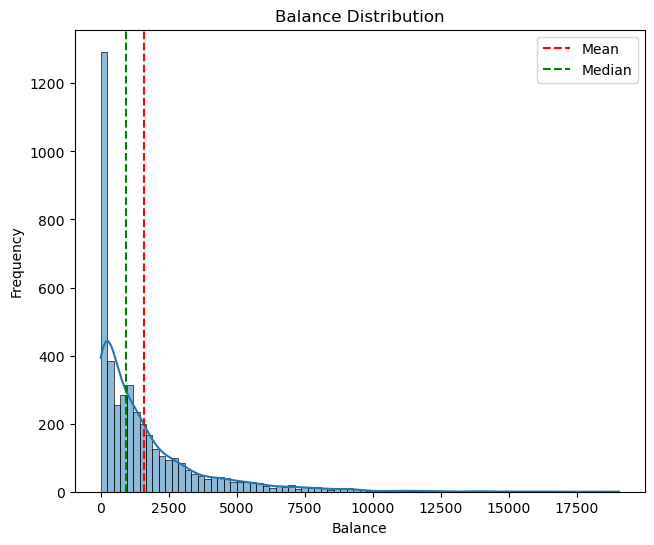

In [203]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(x='BALANCE', data=df_fix, kde=True)
plt.axvline(x=df_fix.BALANCE.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df_fix.BALANCE.median(), color='green', linestyle='--', label='Median')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

`as we can see from the barplot above, many balance are concentrated in low segmented income with 0 balnce. this is effecting the mean and median line which is these line are below 2500 thousand dollar.`

- do people have a shopping culture from balance perspective?

Text(0, 0.5, 'PURCHASES')

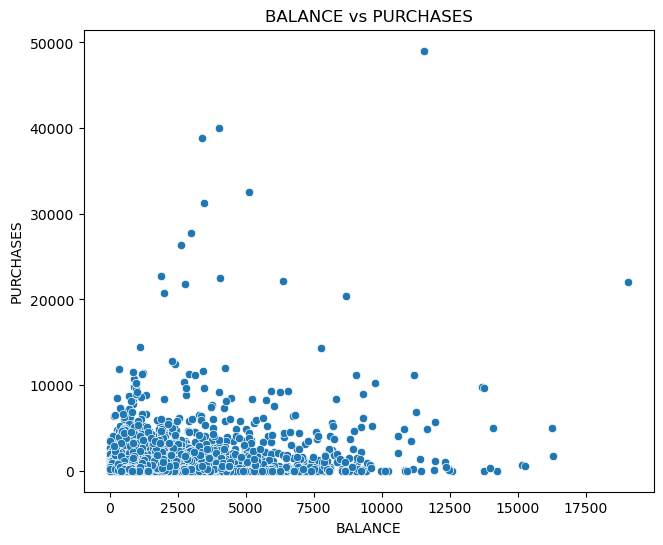

In [204]:
plt.figure(figsize=(25, 6))
sns.histplot(x='BALANCE', data=df_fix, kde=True)
plt.axvline(x=df_fix.BALANCE.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df_fix.BALANCE.median(), color='green', linestyle='--', label='Median')
plt.subplot(1, 3, 2)
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df_fix)
plt.title('BALANCE vs PURCHASES')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

`after we scatter plot balance vs purchase, we got an information that people dont really like to spend their money nor shopping culture. customer mostly concentrated in low balance and low spending. but on the other hand, people with high balance also spend less then people who have fewer balance limit`

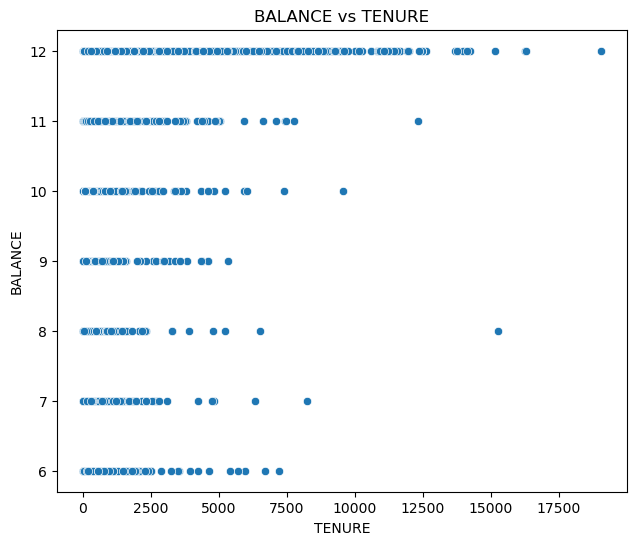

In [205]:
plt.figure(figsize=(25, 6))
sns.histplot(x='BALANCE', data=df_fix, kde=True)
plt.axvline(x=df_fix.BALANCE.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=df_fix.BALANCE.median(), color='green', linestyle='--', label='Median')
plt.subplot(1, 3, 3)
sns.scatterplot(x='BALANCE', y='TENURE', data=df_fix)
plt.title('BALANCE vs TENURE')
plt.xlabel('TENURE')
plt.ylabel('BALANCE')
plt.show()

`then we checking the outliers of all the features`

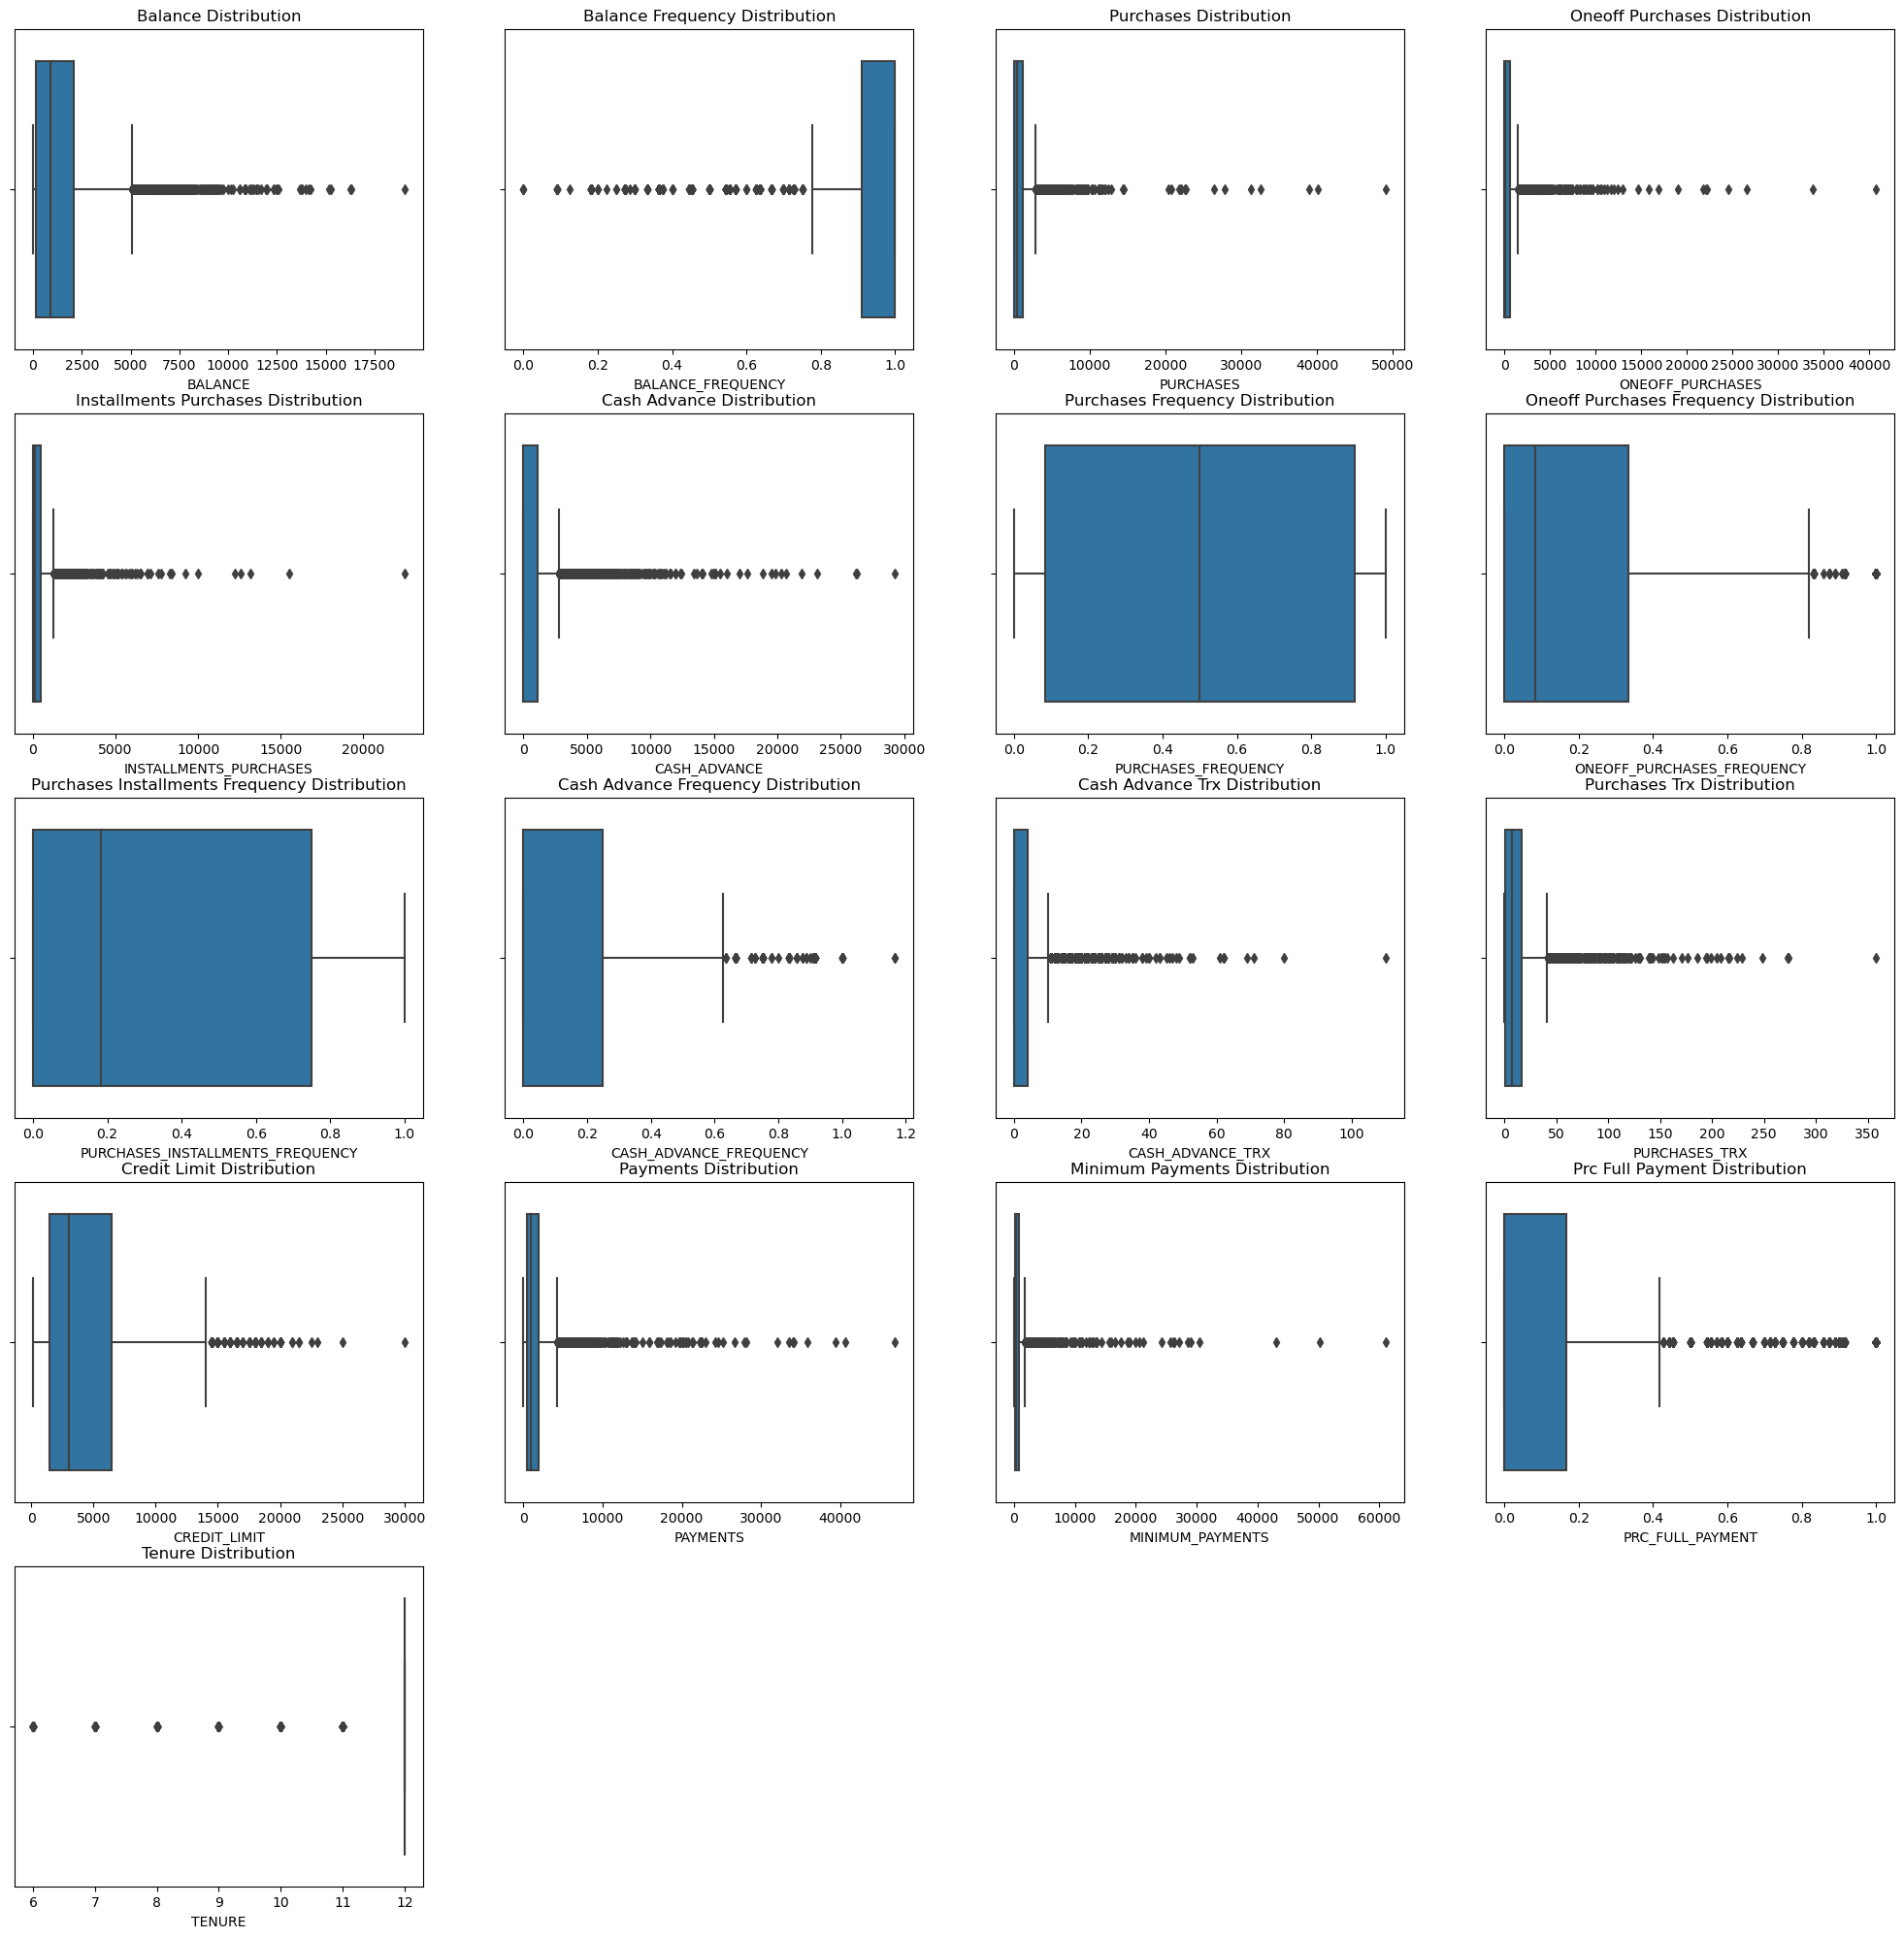

In [206]:
plt.figure(figsize=(25, 30))
for col in df_fix.columns:
    plt.subplot(6, 4, df_fix.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=df_fix)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [207]:
def upper_lower(df_fix, col):
    IQR = df_fix[col].quantile(0.75) - df_fix[col].quantile(0.25)
    upper_bound = df_fix[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df_fix[col].quantile(0.25) - 1.5 * IQR
    return df_fix[(df_fix[col] > lower_bound) & (df_fix[col] < upper_bound)]

In [208]:
# Check Outliers
cols = df_fix.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_fix, cols[i]).shape[0] / df_fix.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,BALANCE,92.56
1,BALANCE_FREQUENCY,82.41
2,PURCHASES,91.38
3,ONEOFF_PURCHASES,89.23
4,INSTALLMENTS_PURCHASES,90.94
5,CASH_ADVANCE,88.51
6,PURCHASES_FREQUENCY,100.00
7,ONEOFF_PURCHASES_FREQUENCY,91.50
8,PURCHASES_INSTALLMENTS_FREQUENCY,100.00
9,CASH_ADVANCE_FREQUENCY,96.04


`From the calculation results above, it turns out that there are a lot of outliers in these columns. So, the outliers will be left.`

In [209]:
# check skewness
for i in df_fix.columns:
    print(i, ': ', df_fix[i].skew())

BALANCE :  2.440901091038025
BALANCE_FREQUENCY :  -2.083168233926595
PURCHASES :  8.902272454100581
ONEOFF_PURCHASES :  10.045515316290516
INSTALLMENTS_PURCHASES :  8.030304885938177
CASH_ADVANCE :  4.713174552567423
PURCHASES_FREQUENCY :  0.035641946018049195
ONEOFF_PURCHASES_FREQUENCY :  1.49450472491376
PURCHASES_INSTALLMENTS_FREQUENCY :  0.4865766900569389
CASH_ADVANCE_FREQUENCY :  1.7888346981313274
CASH_ADVANCE_TRX :  4.722877319817404
PURCHASES_TRX :  4.429897311633816
CREDIT_LIMIT :  1.525378783156858
PAYMENTS :  5.987444897467956
MINIMUM_PAYMENTS :  12.356757627194938
PRC_FULL_PAYMENT :  1.8543999106579778
TENURE :  -2.9969780616789303


`checking the multicolinearity of each columns`

In [210]:
# VIF Calculator
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [211]:
#search for multicolinearity
vif(df_fix[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']])

,Column,VIF
0,BALANCE,4.131763
1,BALANCE_FREQUENCY,23.447308
2,PURCHASES,63626.666144
3,ONEOFF_PURCHASES,33688.274513
4,INSTALLMENTS_PURCHASES,11158.744951
5,CASH_ADVANCE,3.518476
6,PURCHASES_FREQUENCY,26.587443
7,ONEOFF_PURCHASES_FREQUENCY,5.777873
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.571147
9,CASH_ADVANCE_FREQUENCY,5.226124


`eventhough we found that some of our columns got a high score in multicolinearity, we decided to use them to our next processing. this is because i assume, to make a sharp cluster, we need to take as many as information we got`

### Data Scaling

`we scale every columns in our dataset. Because clustering is related to calculating the distance between data, in this section data scaling will be carried out using StandardScaler()`

In [212]:
numcol = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

In [213]:
# scaling
scaler = StandardScaler()
df_fix_scaled = pd.DataFrame(scaler.fit_transform(df_fix))
df_fix_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311580,-0.097897,-0.411460,-0.294554,-0.45176,-0.457172,-0.927807,-0.268859,-0.92876,-0.679523,-0.494608,-0.564026,-0.955537,-0.524061,-0.192570,-0.54393,-2.666446
1,-0.540390,0.506828,-0.196422,-0.009332,-0.45176,-0.457172,-0.927807,-0.268859,-0.92876,-0.679523,-0.494608,-0.564026,-0.955537,-0.509809,-0.304776,-0.54393,-2.666446
2,-0.259370,0.506828,0.189485,0.502529,-0.45176,-0.457172,-0.927807,-0.268859,-0.92876,-0.679523,-0.494608,-0.564026,-0.819978,-0.463406,-0.272064,-0.54393,-2.666446
3,0.302369,0.506828,-0.403875,-0.284495,-0.45176,-0.457172,-0.927807,-0.268859,-0.92876,-0.679523,-0.494608,-0.564026,-0.548860,-0.481422,-0.061411,-0.54393,-2.666446
4,-0.557694,-2.516796,0.077952,0.354593,-0.45176,-0.457172,-0.927807,-0.268859,-0.92876,-0.679523,-0.494608,-0.564026,-0.901314,-0.576804,-0.345956,-0.54393,-2.666446


### PCA

`we need to check if the columns are already significant, so the next step we use PCA to decided the columns should be reduced or not`

In [214]:
pca = PCA(n_components=17)
pca.fit(df_fix_scaled)

PCA(n_components=17)

In [215]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

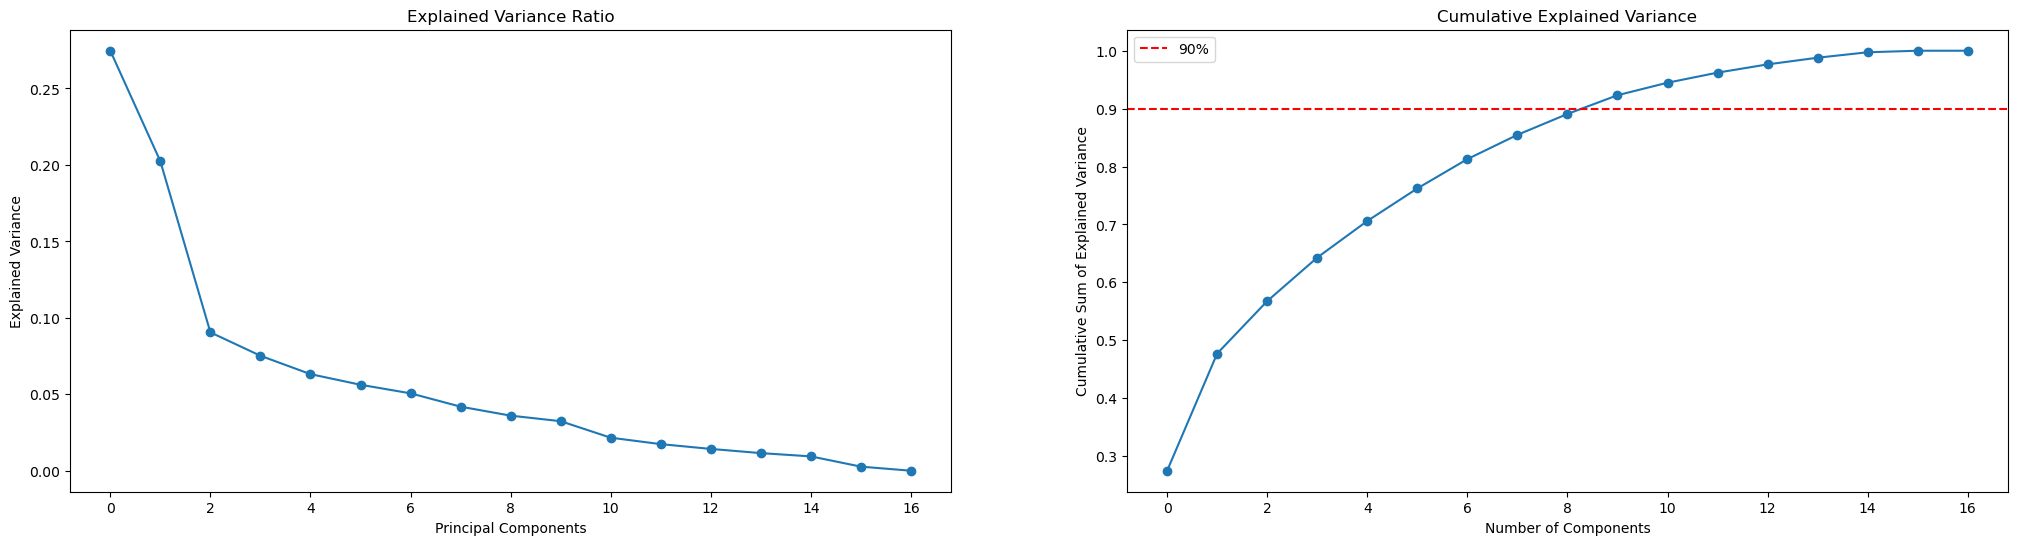

In [216]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

In [217]:
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

Number of components: 9
Explained variance: 0.9231477693621897


`at this point, we can conclude that this dataset would be efficient enough even only with 9 columns so we will reduce our columns from 17 columns to 9 columns`

In [218]:
pca_9d = PCA(n_components=9)

In [219]:
cc_use = pca_9d.fit_transform(df_fix)
cc_use = pd.DataFrame(cc_use, columns=['PCA_' + str(i) for i in range(1, 10)])

`calling the cc_use head, tail and sample`

In [220]:
cc_use.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-4057.224592,684.590157,593.298037,228.471633,-526.007783,341.954527,-204.803430,5.648243,-0.204949
1,-3958.108281,1336.440642,243.018909,164.081079,-492.945948,-92.809940,-323.955710,8.064329,-0.198437
2,-2926.568783,1734.333574,-40.697939,648.115894,-1172.687608,-310.646846,-598.548942,13.281860,-0.132404
3,-2560.761546,-393.062530,293.618144,551.763356,-980.875007,813.974994,-289.546608,6.897330,-0.165881
4,-3629.427948,1732.464088,-169.145015,410.426316,-833.517610,-552.563567,-479.845076,11.621608,-0.171577


In [221]:
cc_use.tail()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
4311,-3090.475777,765.535365,1598.999333,-786.138449,-373.717983,186.873208,-96.086546,4.596681,-0.258283
4312,893.976235,351.029324,2496.324900,-2967.887654,1137.114546,-435.356115,-45.949331,2.365075,-0.142096
4313,3941.747264,-3954.805715,-2124.395459,-471.873694,-248.056222,-423.543751,-235.666430,-7.025395,-0.314912
4314,2766.795662,-2442.890945,1876.469961,613.724606,-2720.358081,-1897.277593,-343.689449,-9.771553,-0.218358
4315,1094.828653,-58.347618,2636.677641,-1716.226851,-388.093958,-1240.635684,863.331036,-3.345574,-0.329497


In [222]:
cc_use.sample()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
3738,12848.62736,-10493.292759,-1454.971924,-389.494327,-2892.191009,1340.469352,-391.358741,12.506052,0.194597


## Modelling

`we will use K-means clustering to handle this dataset`

In [223]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters=k, random_state=23).fit(cc_use).inertia_ for k in K]

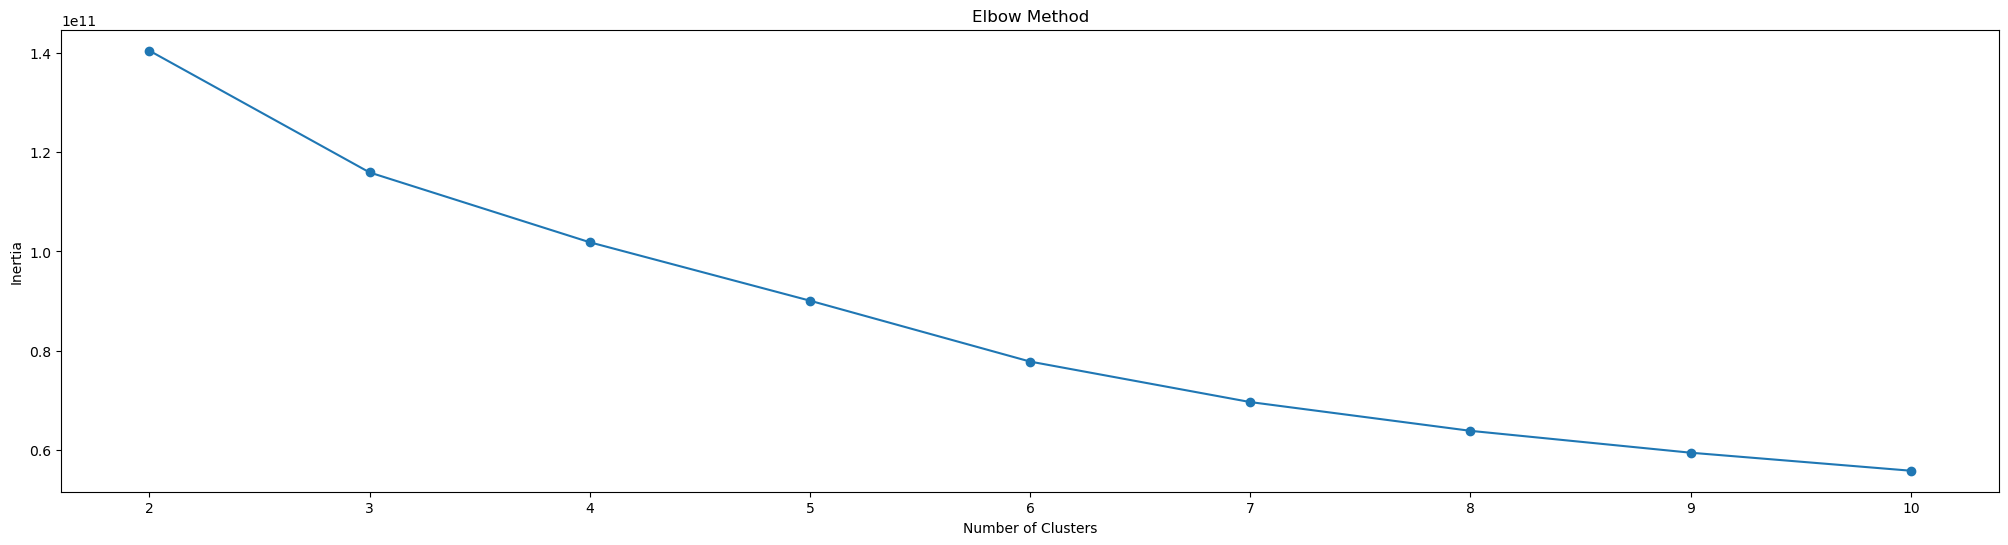

In [224]:
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

`from plot above number 2,3 will be a good candidate but we need to check from silhoutte score too`

In [225]:
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])

In [226]:
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(cc_use, KMeans(n_clusters=i, random_state=23).fit(cc_use).labels_), 3)]

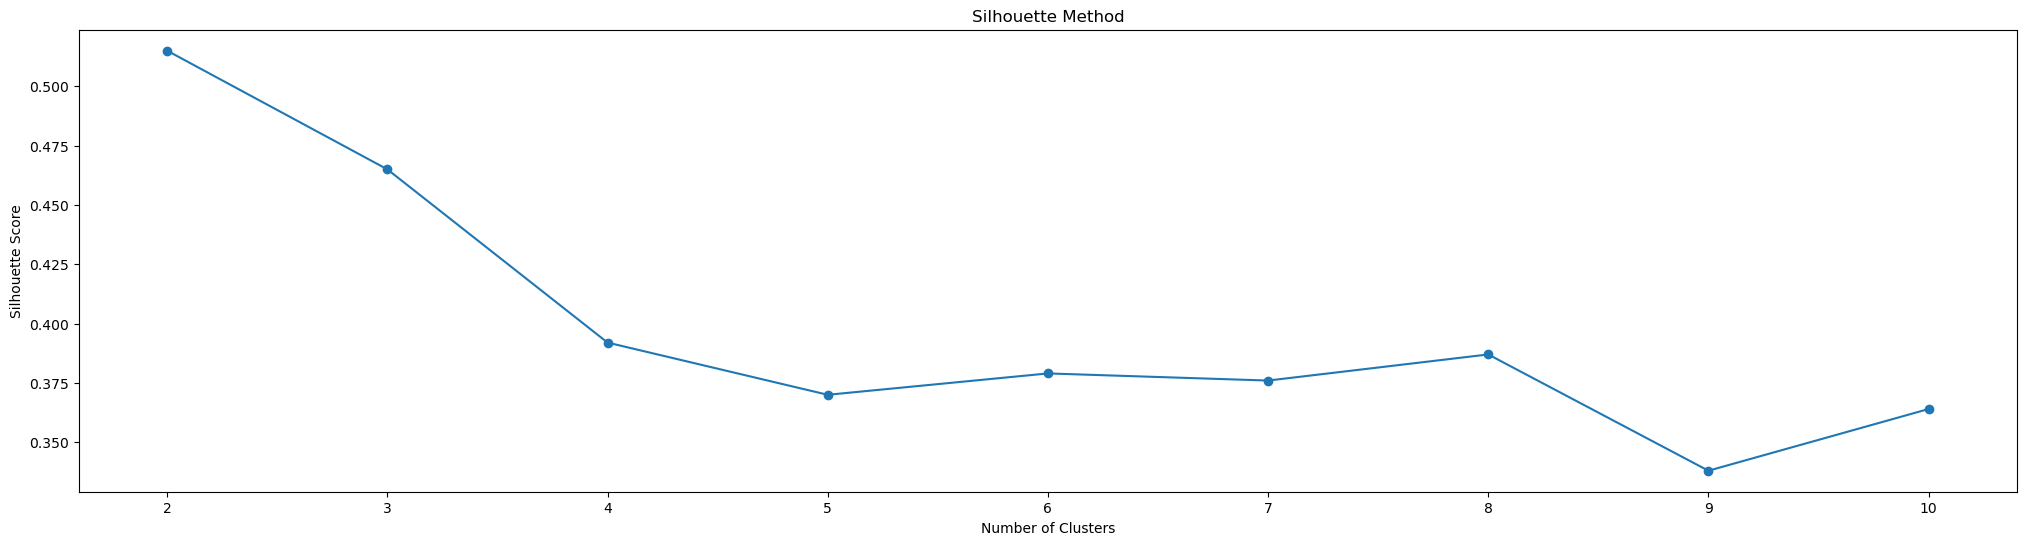

In [227]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [228]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
0,2.0,0.515
1,3.0,0.465
2,4.0,0.392
6,8.0,0.387
4,6.0,0.379
5,7.0,0.376
3,5.0,0.370
8,10.0,0.364
7,9.0,0.338


`after getting the silhouette score, k number 2 has the highest score than another one, so we will use k=2 instead`

In [229]:
kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(cc_use)

KMeans(n_clusters=2, random_state=23)

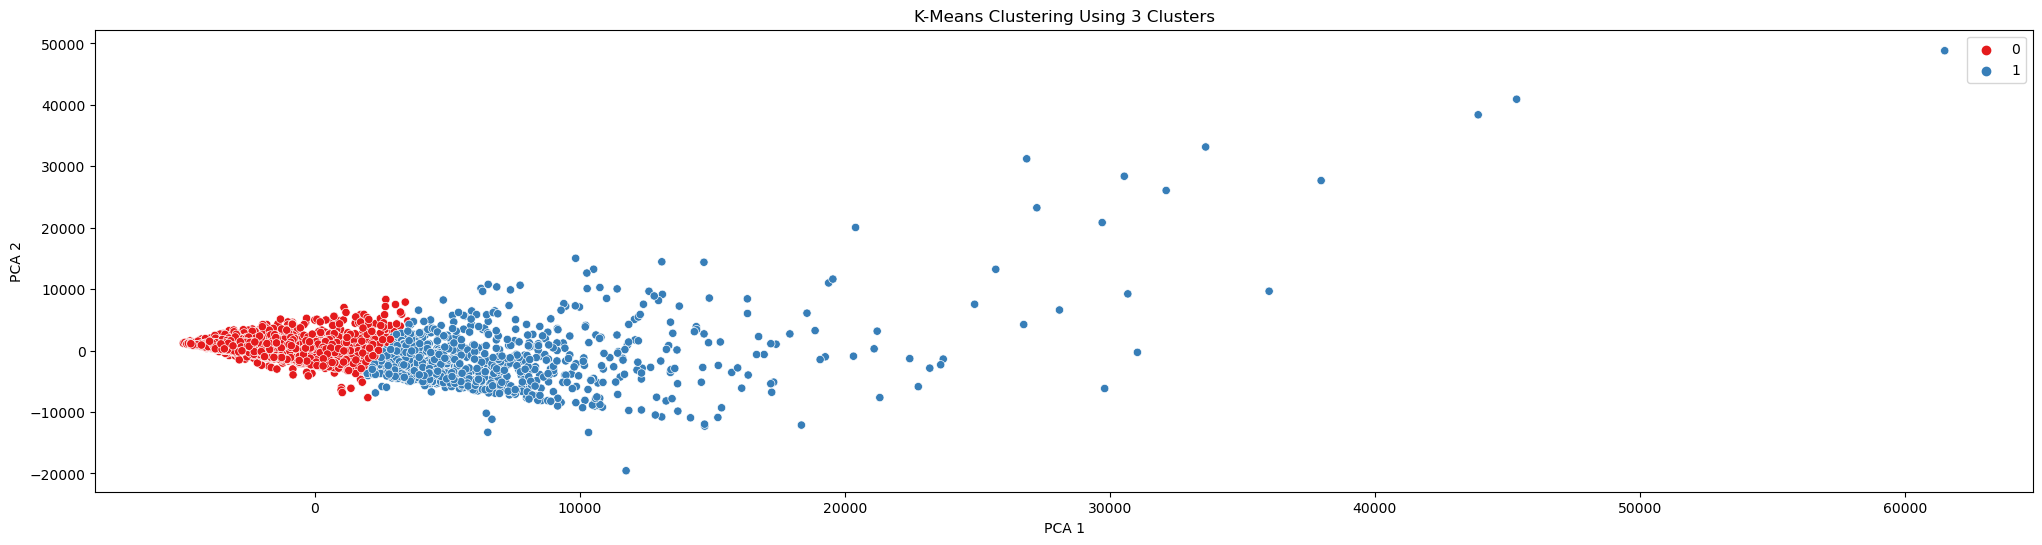

In [230]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=cc_use, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

`clusterng the dataframe into 2 cluster`

## Data Evaluation

`predicting the customer into 2 segmented cluster`

In [231]:
data_pred = kmeans.predict(cc_use)

In [232]:
cluster_cc = df_fix.copy()
cluster_cc['CLUSTER'] = data_pred
cluster_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0,8,0
3,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0,8,0
4,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0,8,0
5,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,2500.0,343.102984,712.986387,0.0,8,0
7,424.994385,0.375,1200.0,1200.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,57.266292,56.720210,0.0,8,0


`presenting cluster 0`

In [233]:
cluster_cc[cluster_cc['CLUSTER'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9,0
4469,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10,0
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,0
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,0


`presenting cluster 1`

In [234]:
cluster_cc[cluster_cc['CLUSTER'] == 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
28,154.641707,0.363636,1897.92,97.92,1800.00,0.000000,0.250000,0.166667,0.166667,0.000000,0,5,13500.0,5563.437084,248.700571,1.000000,12,1
54,996.619846,0.727273,581.80,520.00,61.80,0.000000,0.250000,0.083333,0.166667,0.000000,0,3,8500.0,2088.919798,238.591204,0.000000,12,1
55,939.152528,1.000000,3393.25,3364.59,77.66,0.000000,0.250000,0.250000,0.083333,0.000000,0,5,9000.0,2768.821579,267.093439,0.000000,12,1
77,319.037744,0.818182,1262.28,1262.28,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,10500.0,1350.541585,218.810614,0.125000,12,1
91,6.149295,0.181818,169.01,0.00,169.01,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,10000.0,731.852542,128.525835,0.666667,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,5311.078831,1.000000,1349.62,887.94,461.68,4258.489193,0.833333,0.750000,0.833333,0.416667,13,21,6000.0,2212.652278,2429.739931,0.000000,12,1
4450,1226.561937,0.857143,360.00,360.00,0.00,7883.541720,0.857143,0.857143,0.000000,0.857143,30,6,2500.0,10132.432360,920.287770,0.600000,7,1
4466,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11,1
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1


## EDA After Modelling

- how is cluster distribution in dataset?

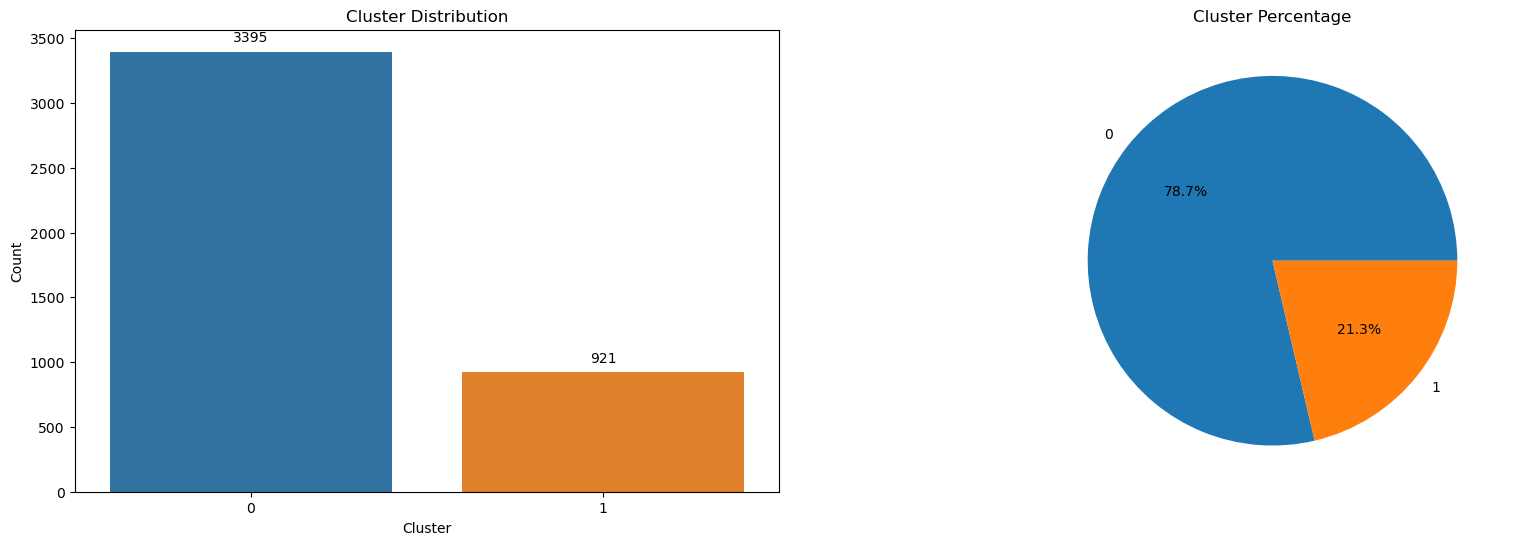

In [235]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=cluster_cc)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cluster_cc['CLUSTER'].value_counts(), labels=cluster_cc['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

`most populated customer is in 0 cluster, then cluster 1. cluster 0 has 3395 customer or we could call around 78% population in this dataset is belongs to cluster 0. then cluster 1 consist 921 customer and its shows 21% of the population` 

- how is the distribution of balance, purchase and credit limit for each cluster?

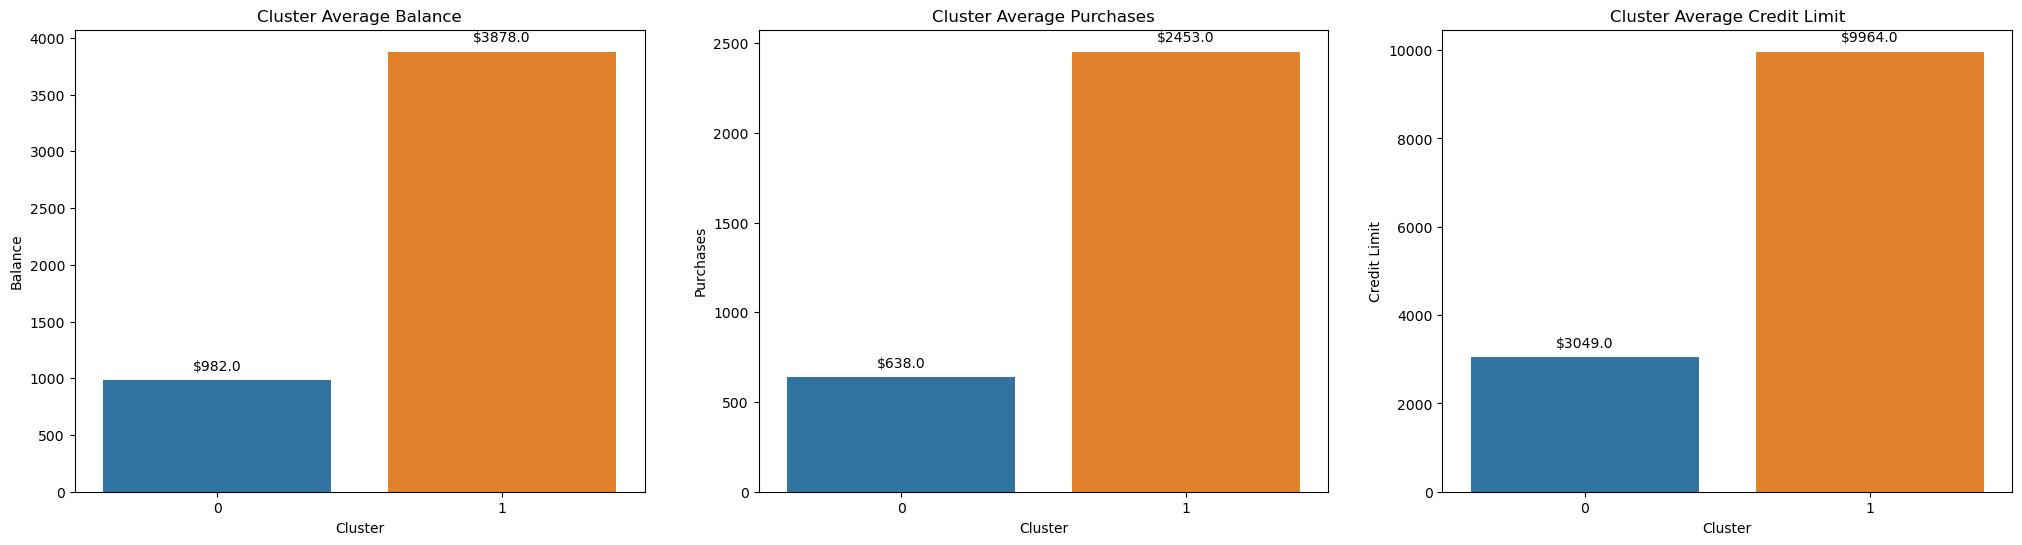

In [236]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.barplot(x='CLUSTER', y='BALANCE', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Balance')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.subplot(1, 3, 2)
fig = sns.barplot(x='CLUSTER', y='PURCHASES', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Purchases')
plt.xlabel('Cluster')
plt.ylabel('Purchases')
plt.subplot(1, 3, 3)
fig = sns.barplot(x='CLUSTER', y='CREDIT_LIMIT', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Credit Limit')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

`cluster 1 is completely has the highest average balance, average, purchase and also average of credit limit. Balance between cluster 0 and cluster 1 has a huge differences. cluster 1 has 3878 thousand dollars but cluster 0 only earn 982, this balance affected to their shopping culture, cluster 1 spend average around 2453 thousand dollars than cluster 0 who only spend 638 dollars. because of this shopping culture, the credit limit between cluster 1 is likely much higher than cluster 0 its 9964 thousand dollars compare to 3049 thousand dollars. this indicated that your balance will affects yours shopping culture and also make your credit limit improving`

- how is average purchase transaction and tenure by cluster?

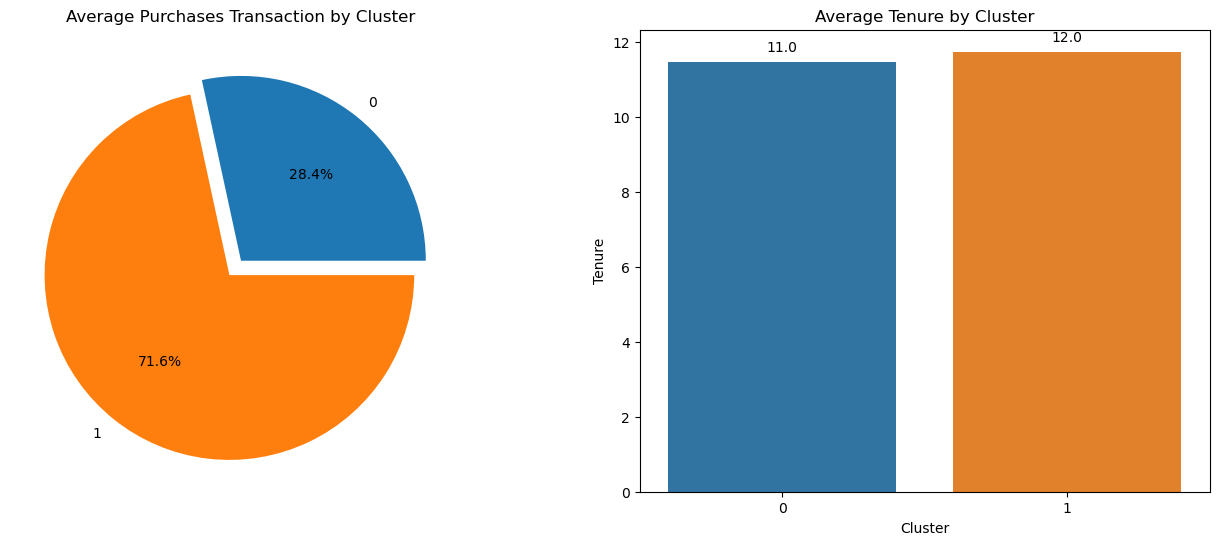

In [237]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(cluster_cc.groupby('CLUSTER').PURCHASES_TRX.mean(), labels=cluster_cc.groupby('CLUSTER').PURCHASES_TRX.mean().index, autopct='%1.1f%%', explode=[0, 0.1])
plt.title('Average Purchases Transaction by Cluster')
plt.subplot(1, 3, 2)
fig = sns.barplot(x='CLUSTER', y='TENURE', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate(str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average Tenure by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tenure')
plt.show()

`from pieplot above, we know that average purchase is definitely willl be held by cluster 1 than cluster 0. cluster 1 has 71% and cluster 0 only has 29%. this is makes sense, if cluster 1 has a higher balance, and purchase, it will be directly affects the average transaction. but we should look into average tenure, there is no huge differences between cluster 1 and cluster 0. cluster 1 has 12 months and cluster 0 has 11 months`

## Model Inference

In [238]:
with open('model_k_means.pkl','wb') as file_1:
    joblib.dump(kmeans, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
     joblib.dump(scaler, file_2)

with open('list_num_col.txt', 'w') as file_3:
     json.dump(numcol, file_3)

with open('list_pca9_col.pkl', 'wb') as file_5:
     joblib.dump(pca_9d, file_5)

## Overall Conclusion

- `many balance are concentrated in low segmented income with 0 balnce. this is effecting the mean and median line which is these line are below 2500 thousand dollar.`
- `people dont really like to spend their money nor shopping culture. customer mostly concentrated in low balance and low spending. but on the other hand, people with high balance also spend less then people who have fewer balance limit`
- `most populated customer is in 0 cluster, then cluster 1. cluster 0 has 3395 customer or we could call around 78% population in this dataset is belongs to cluster 0. then cluster 1 consist 921 customer and its shows 21% of the population` 
- `cluster 1 is completely has the highest average balance, average, purchase and also average of credit limit. Balance between cluster 0 and cluster 1 has a huge differences. cluster 1 has 3878 thousand dollars but cluster 0 only earn 982, this balance affected to their shopping culture, cluster 1 spend average around 2453 thousand dollars than cluster 0 who only spend 638 dollars. because of this shopping culture, the credit limit between cluster 1 is likely much higher than cluster 0 its 9964 thousand dollars compare to 3049 thousand dollars. this indicated that your balance will affects yours shopping culture and also make your credit limit improving`
- `average purchase is definitely willl be held by cluster 1 than cluster 0. cluster 1 has 71% and cluster 0 only has 29%. this is makes sense, if cluster 1 has a higher balance, and purchase, it will be directly affects the average transaction. but we should look into average tenure, there is no huge differences between cluster 1 and cluster 0. cluster 1 has 12 months and cluster 0 has 11 months`

## Conceptual Problems

- Apakah yang dimaksud dengan inertia pada algoritma K-Means?

`Inertia, also known as within-cluster sum of squares, is a metric used to evaluate the quality of clustering in the K-Means algorithm. It measures the sum of the squared distances between each data point and its assigned cluster centroid. In other words, it measures how spread out the data points are within each cluster.`
`The K-Means algorithm works by iteratively assigning data points to the nearest cluster centroid, then recalculating the centroids based on the new assignments, and repeating the process until the assignments no longer change. In each iteration, the algorithm tries to minimize the inertia by adjusting the positions of the centroids to better fit the data points.`
`The lower the inertia, the better the clustering, as it indicates that the data points within each cluster are tightly packed and close to their centroid. However, it is important to note that minimizing inertia alone may not always lead to the best clustering solution, as it can be sensitive to the initial placement of the centroids and the choice of the number of clusters (K) in the algorithm. Therefore, it is often necessary to use additional metrics and techniques to evaluate the quality of the clustering results.`

- Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

`The Elbow Method is a heuristic technique used to determine the optimal number of clusters (K) in the K-Means clustering algorithm. It is based on the observation that as the number of clusters increases, the inertia (within-cluster sum of squares) tends to decrease, but at a decreasing rate. The optimal number of clusters is often identified at the "elbow point," where the rate of decrease in inertia starts to level off.`

`Reasons for use:`

`The Elbow Method is a simple and easy-to-use technique that provides a quick estimate of the optimal number of clusters for a given dataset.It can help avoid underfitting (using too few clusters) or overfitting (using too many clusters) in the K-Means algorithm. It is a good starting point for exploring different values of K in more sophisticated clustering algorithms.`

`How to use:`

`First, run the K-Means algorithm for a range of K values and record the inertia for each value. Then, plot the inertia values against the corresponding K values. Look for the "elbow point" in the plot, where the inertia starts to level off and the rate of decrease slows down. This is often considered the optimal number of clusters for the dataset.`

`Strengths:`

`The Elbow Method is a quick and simple technique that does not require any prior knowledge of the data or clustering algorithm.`
`It provides a visual and intuitive way to determine the optimal number of clusters.`

`Weaknesses:`

`The Elbow Method is a heuristic technique that relies on visual inspection and subjective interpretation of the plot. The optimal number of clusters may not be obvious or may differ depending on the dataset and clustering algorithm. It assumes that the relationship between the number of clusters and the inertia is monotonically decreasing, which may not always be the case. It can be sensitive to the choice of the initial centroids and the scaling of the data.`